In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score,recall_score,confusion_matrix

In [96]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.189865,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.305633,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


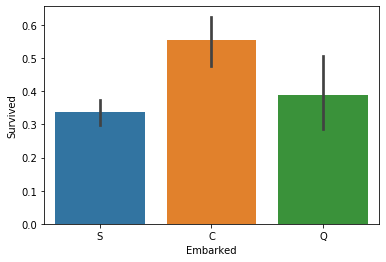

In [11]:
sns.barplot(train['Embarked'],train['Survived'])

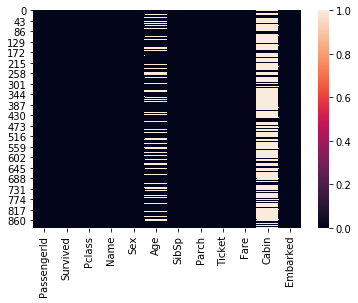

In [12]:
sns.heatmap(train.isnull())

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train.groupby('Embarked')['Age'].mean()

Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

#### A good way to fill the missing values is with help of data mining and analysing multiple features instead of just doing a univariate analysis

Text(0.5, 1.0, 'Mean age based on Embarked location, Pclass and Gender')

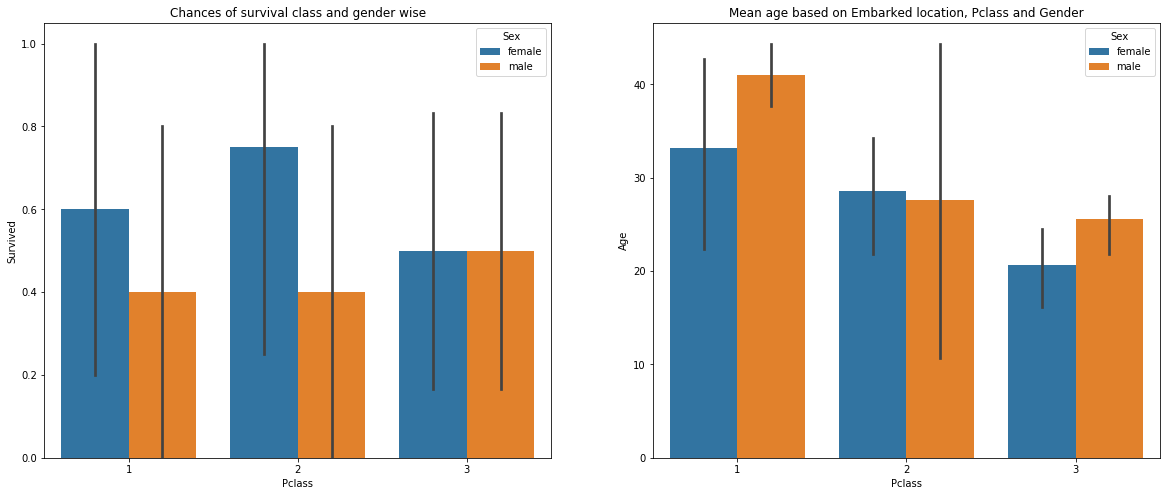

In [72]:
df = train.groupby(['Embarked','Pclass','Sex','Survived'])['Age'].mean().to_frame().reset_index()
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot('Pclass','Survived',data=df,hue='Sex')
plt.title('Chances of survival class and gender wise')
plt.subplot(1,2,2)
sns.barplot('Pclass','Age',data=df,hue='Sex')
plt.title('Mean age based on Embarked location, Pclass and Gender')

### Based on the above plots:
* Chances of survial of women are  higher than the men in general except for the third class where both men and women have 50% survival chances based on the given data
* There's a clear difference between mean age of men and women in all the classes threfore in order to fill up the missing values in the age feature this differnence has to be accounted  
* Average age of Women in 1st class : 34 years
* Average age of Men in 1st class : 41 years
* Average age of Women in 2nd class : 29 years
* Average age of Men in 2nd class : 28 years
* Average age of Women in 3rd class : 21 years
* Average age of Men in 3rd class : 26 years



In [97]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [98]:
def age_imput(col):
    age = col[0]
    Pclass = col[1]
    sex= col[2]
    
    if pd.isnull(age):
        if Pclass==1:
            if sex == 'male':
                return 41
            elif sex == 'female':
                return 34
            
        elif Pclass==2:
            if sex == 'male':
                return 28
            elif sex == 'female':
                return 29
            
        elif Pclass==3:
            if sex == 'male':
                return 26
            elif sex == 'female':
                return 21

    else:
        return age

In [99]:
train['Age'] = train[['Age','Pclass','Sex']].apply(age_imput,axis=1)

In [114]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [113]:
train['Embarked'].replace(np.nan,'S',inplace=True)

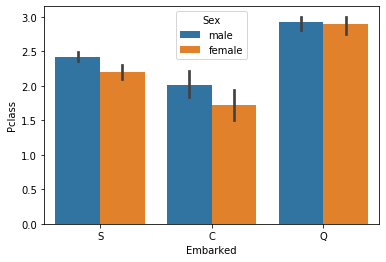

In [110]:
sns.barplot(train['Embarked'],train['Pclass'],hue=train['Sex'])

In [116]:
train.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [120]:
df_train = pd.concat([train.drop(['Name','Sex','Ticket','Embarked'],axis=1)
                  ,pd.get_dummies(train['Embarked'])
                  ,pd.get_dummies(train['Sex'])],axis=1)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [124]:
x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [227]:
from sklearn.preprocessing import PolynomialFeatures,

In [238]:
pf = PolynomialFeatures(degree=3).fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(pf, y, test_size=0.3, random_state=100)

## Different Classifiers

In [239]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(random_state=1)
log = LogisticRegression(max_iter=500)
xgb = XGBRFClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
svc = SVC()

In [240]:
models = [rf,dt,log,xgb,knn,gnb,svc]

### Cross-Validation for different models

In [241]:
for model in models:
    c = cross_val_score(model,pf,y,cv=50,n_jobs=-1)
    print(np.mean(c))

0.8075163398692812
0.7745098039215685
0.7701960784313724
0.8274509803921568
0.7142483660130717
0.6916339869281045
0.6422875816993465


* Based on the above scores xgb was selected 

In [199]:
y_xgb = xgb.fit(X_train,y_train).predict(X_test)
print(confusion_matrix(y_test,y_xgb))
print(classification_report(y_test,y_xgb))

[[145  14]
 [ 33  76]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       159
           1       0.84      0.70      0.76       109

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



### Hyperparameter tuning using Grid Search

In [221]:
param = {'learning_rate':[0.1,0.2,0.5,0.6,1,1.5,2]}
gv = GridSearchCV(xgb,param_grid=param,cv=10)

In [222]:
gv.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bynode=0.8,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       learning_rate=1, max_delta_step=None,
                                       max_depth=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       n_estima...
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None,
                                       reg_lambda=1e-05, sca

In [223]:
gv.best_params_

{'learning_rate': 0.1}

#### learning rate of 0.1 gives us the best result

In [225]:
xgb = XGBRFClassifier(learning_rate=0.1)
y_xgb = xgb.fit(X_train,y_train).predict(X_test)
print(confusion_matrix(y_test,y_xgb))
print(classification_report(y_test,y_xgb))

[[145  14]
 [ 33  76]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       159
           1       0.84      0.70      0.76       109

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [232]:
param = {'max_depth':[5,6,7,8,9],'min_samples_split':[2,3,4,5]}

In [233]:
gv = GridSearchCV(dt,param_grid=param,cv=10,n_jobs=-1)

In [235]:
gv.fit(pf,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5]},
             pr

In [236]:
gv.best_params_

{'max_depth': 7, 'min_samples_split': 3}

In [237]:
dt = DecisionTreeClassifier(random_state=1,max_depth=7,min_samples_split=3)
y_dt = dt.fit(X_train,y_train).predict(X_test)
print(confusion_matrix(y_test,y_dt))
print(classification_report(y_test,y_dt))

[[139  20]
 [ 34  75]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       159
           1       0.79      0.69      0.74       109

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

